<a href="https://colab.research.google.com/github/SWAROOPPATIL96/Walmart-Sales/blob/main/WALMART_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis: ARIMA  

![Walmart logo](https://imgur.com/SxSjgvk.png)

##  Store Sales Forecasting For Next 12 Weeks And some use full insights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv(r"D:\EDUCATION\Data Sceince\Projects\Walmart\Walmart.csv")

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.set_index('Date', inplace=True)
a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:4


Weekly_Sales    float64
dtype: object

In [ ]:
sales.head()

,Weekly_Sales
Date,
01-04-2011,1900246.47
01-06-2012,2179360.94
01-07-2011,2051533.53
01-10-2010,1842821.02
02-03-2012,2206319.90


In [ ]:
sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace = True)

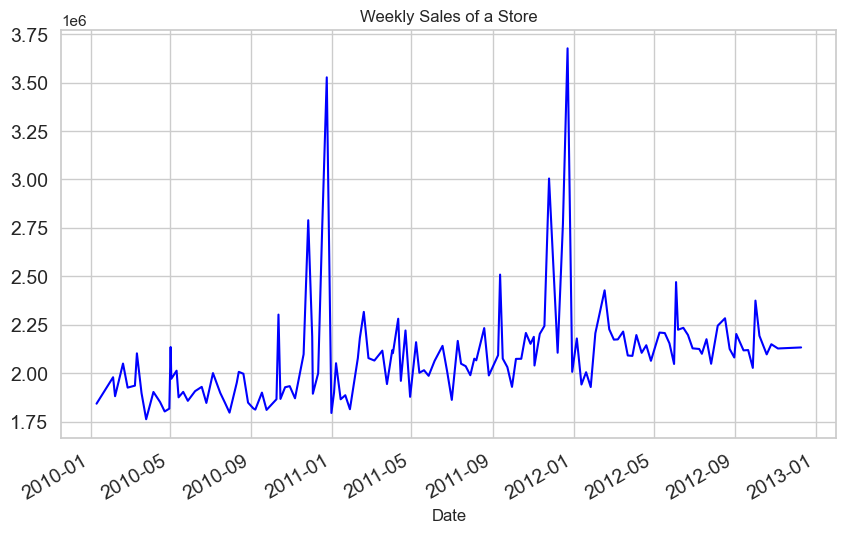

<Figure size 640x480 with 0 Axes>

In [ ]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2+ KB


In [ ]:
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,


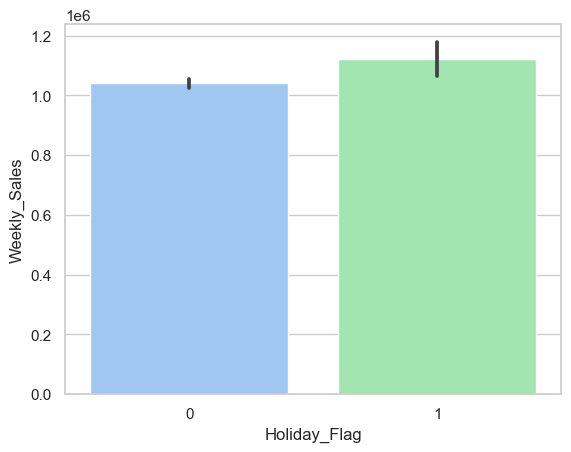

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

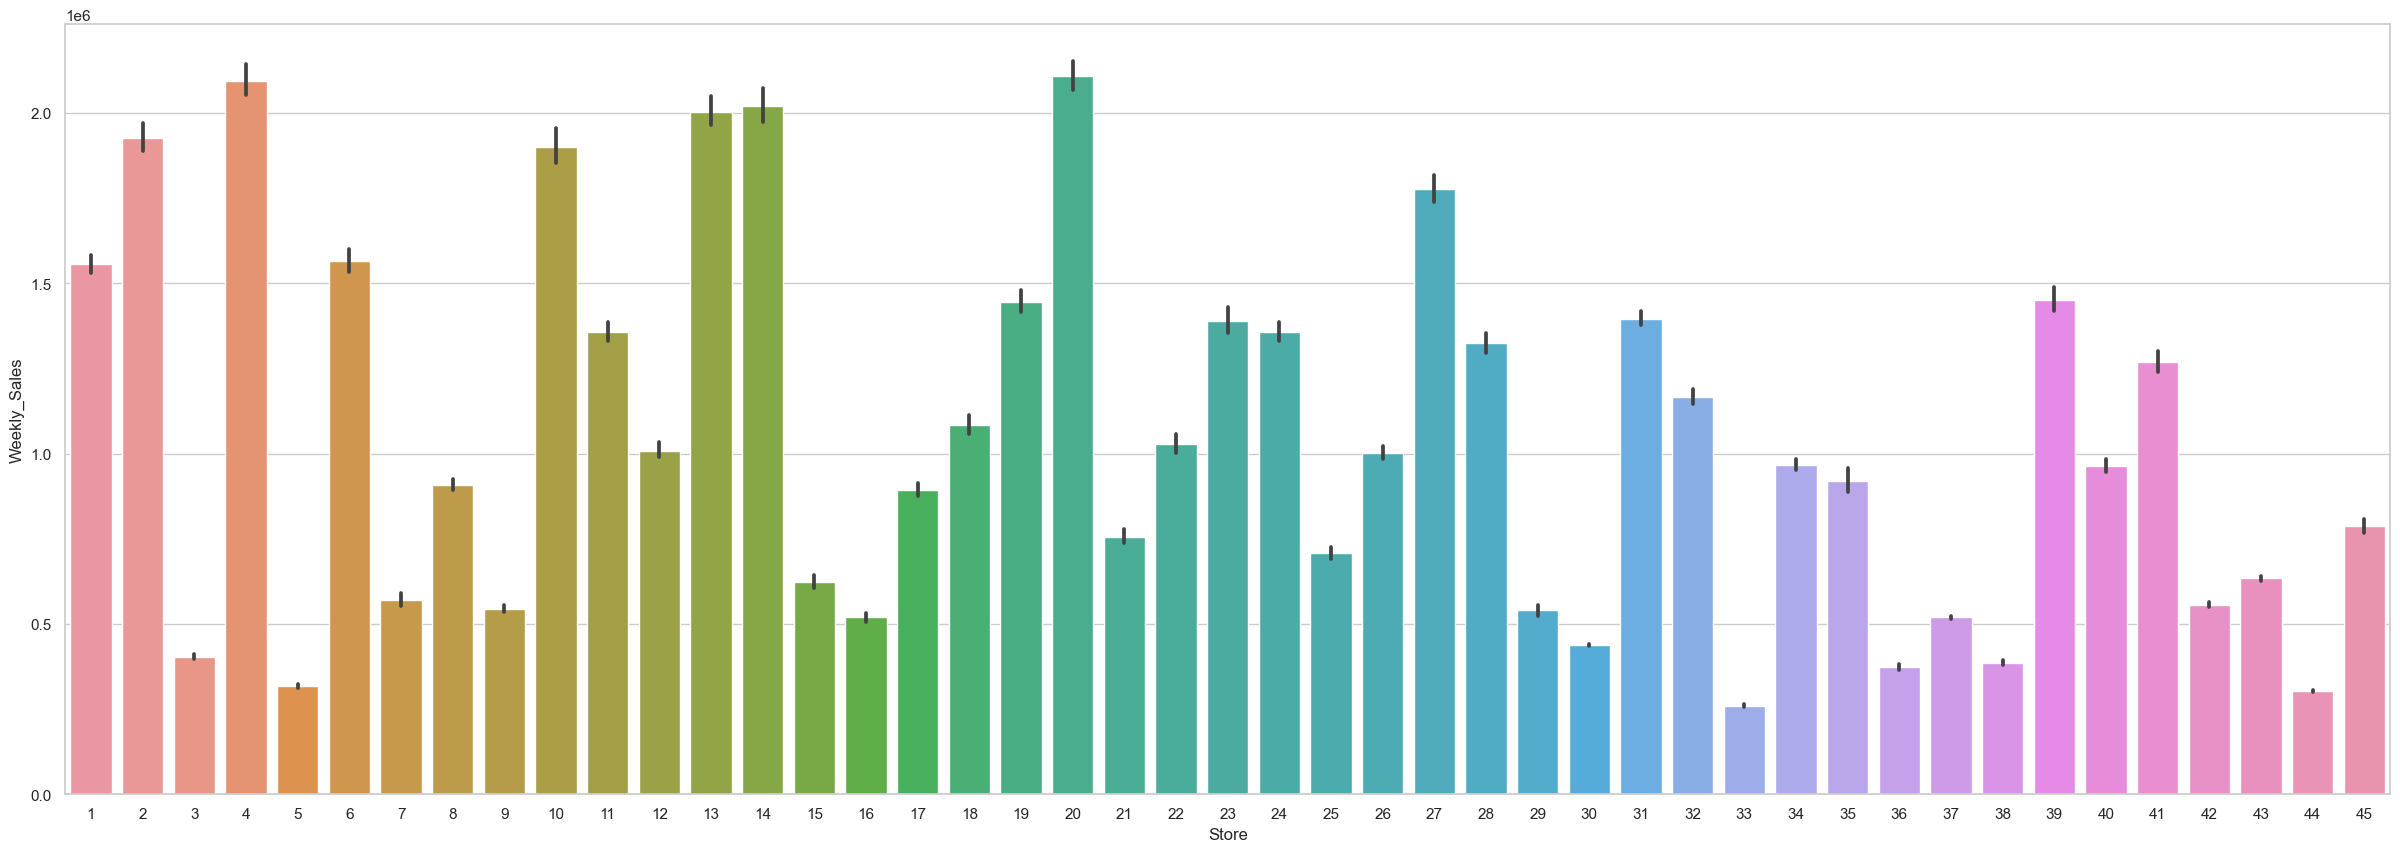

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

##According to the Barplot Top 5 performing stores are,
Store-20
Store-4
Store-13
Store-14
Store-10

&
 Wrost performing stores is
Store-33


In [ ]:
#Lets Compare High and low perform Sotre
store20 = df[df.Store == 20]

#Lets Compare High and low perform Sotre
store33 = df[df.Store == 33]




In [ ]:
frams=[store20,store33]
result=pd.concat(frams)

In [ ]:
result.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,20,2401395.47,0,25.92,2.784,204.247194,8.187
12-02-2010,20,2109107.90,1,22.12,2.773,204.385747,8.187
19-02-2010,20,2161549.76,0,25.43,2.745,204.432100,8.187
26-02-2010,20,1898193.95,0,32.32,2.754,204.463087,8.187
05-03-2010,20,2119213.72,0,31.75,2.777,204.494073,8.187


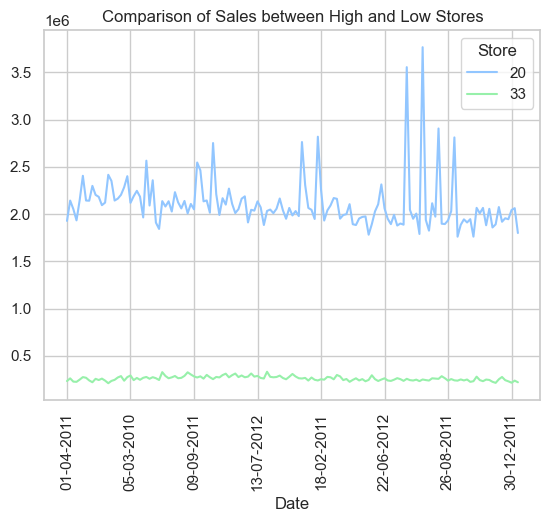

In [ ]:
monthly_sales = pd.pivot_table(result, values="Weekly_Sales", columns="Store", index="Date")
monthly_sales.plot(rot=90, title="Comparison of Sales between High and Low Stores")

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


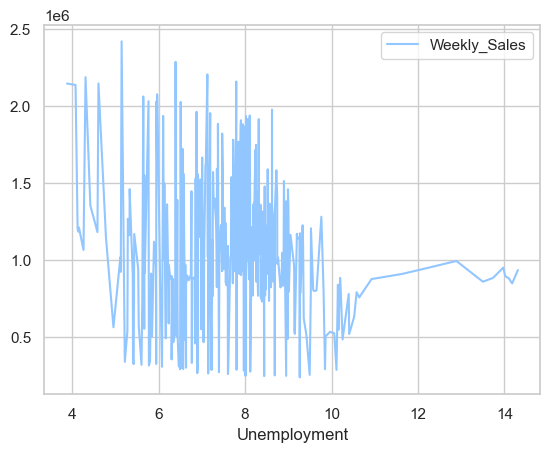

In [ ]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

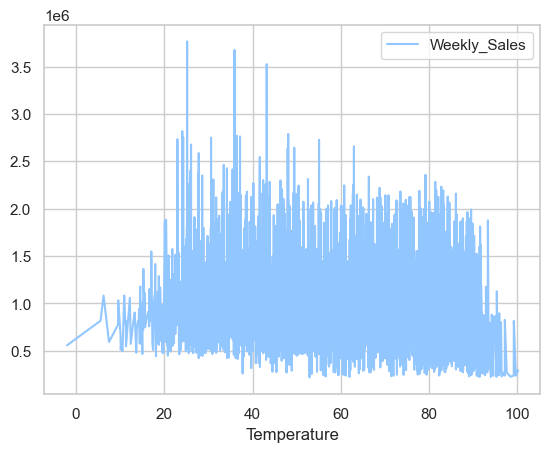

In [ ]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

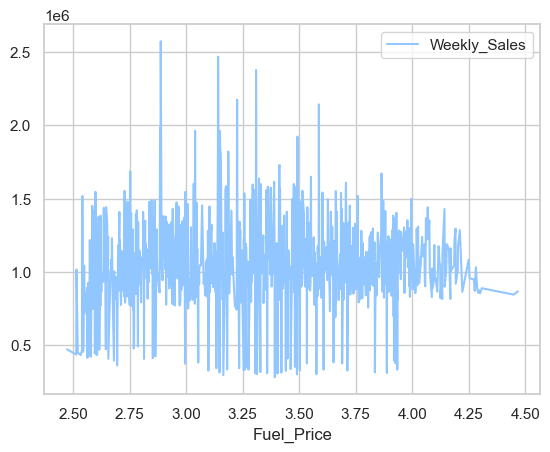

In [ ]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

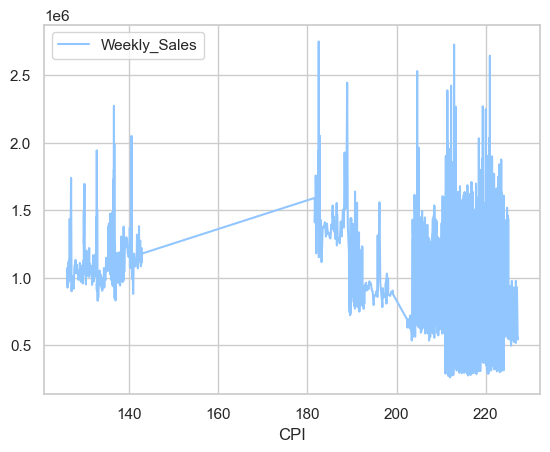

In [ ]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

#From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

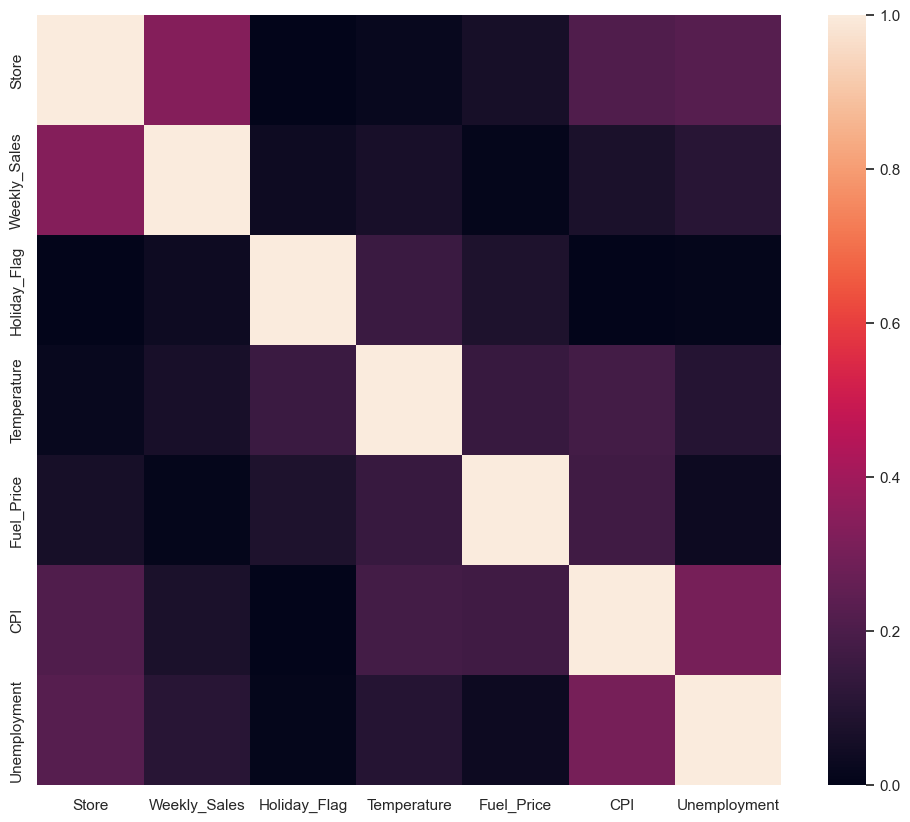

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr().abs())    # To see the correlations
plt.show()


<Figure size 640x480 with 0 Axes>

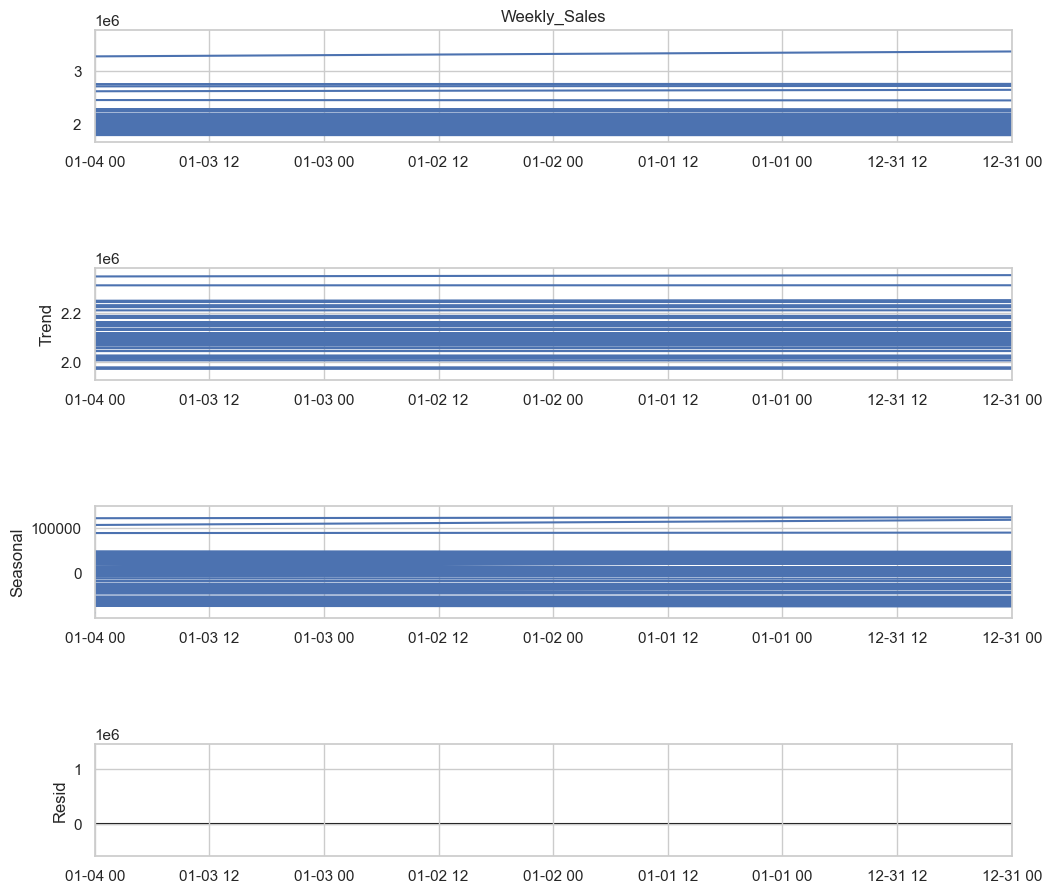

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = df[df.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

In [ ]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

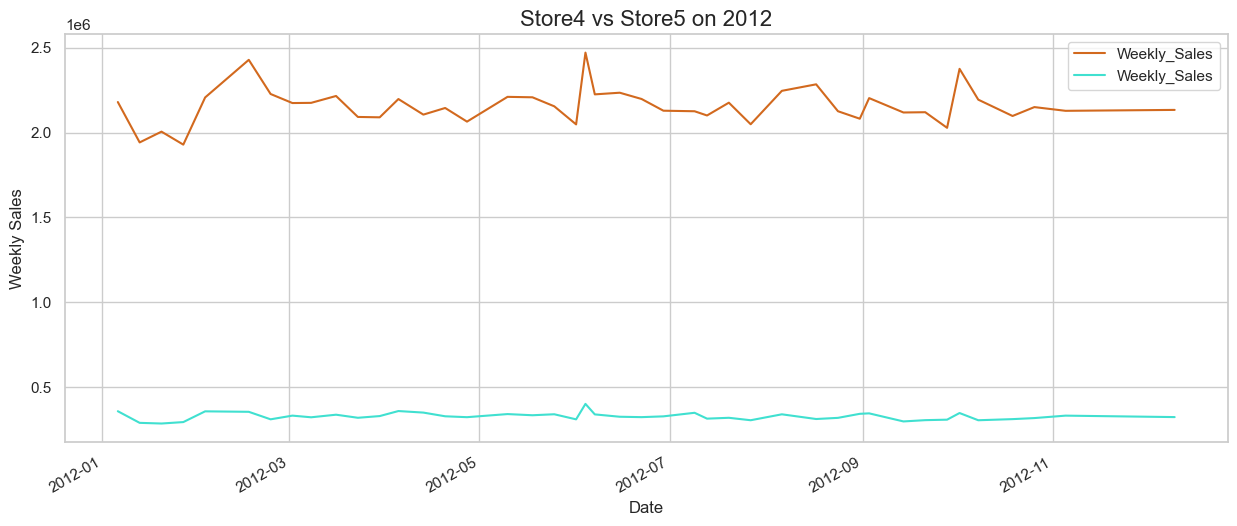

In [ ]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Swaroop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Swaroop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Swaroop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Swaroop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Swaroop\anaconda3

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0366      0.339     -3.058      0.002      -1.701      -0.372
ar.L2         -0.8720      0.389     -2.243      0.025      -1.634      -0.110
ar.L3         -0.5928      0.342     -1.736      0.083      -1.262       0.077
ar.L4         -0.6323      0.209     -3.027      0.002      -1.042      -0.223
ma.L1         -2.2776      0.365     -6.234      0.000      -2.994      -1.562
ma.L2          1.5800      0.701      2.252      0.024       0.205       2.955
ma.L3         -0.2994      0.360     -0.832      0.406      -1.005       0.406
ar.S.L52      -0.2924      0.145     -2.015      0.044      -0.577      -0.008
sigma2      3.419e+11   1.05e-12   3.26e+23      0.000    3.42e+11    3.42e+11


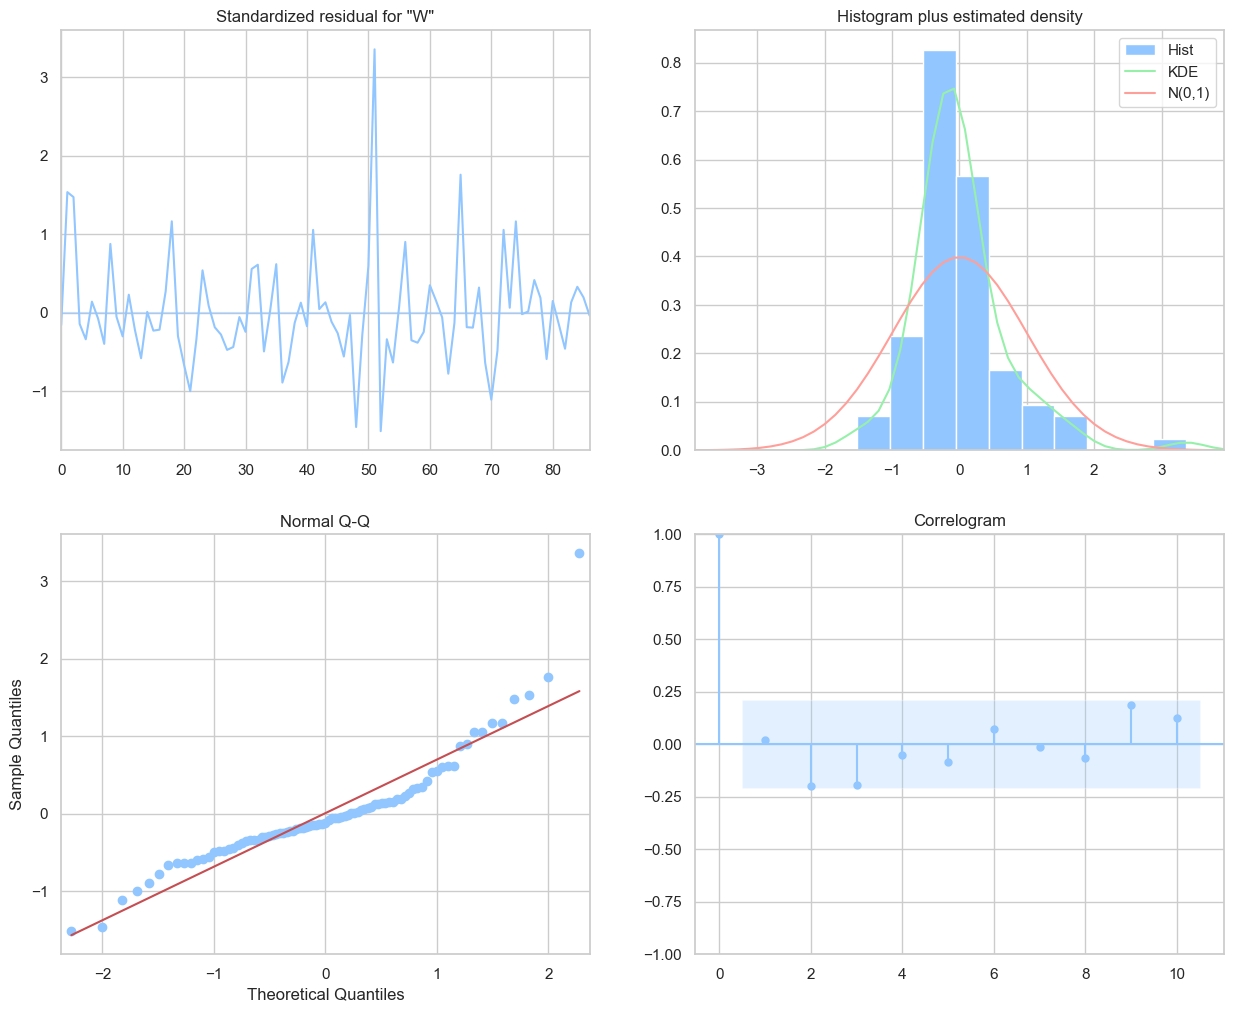

In [ ]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

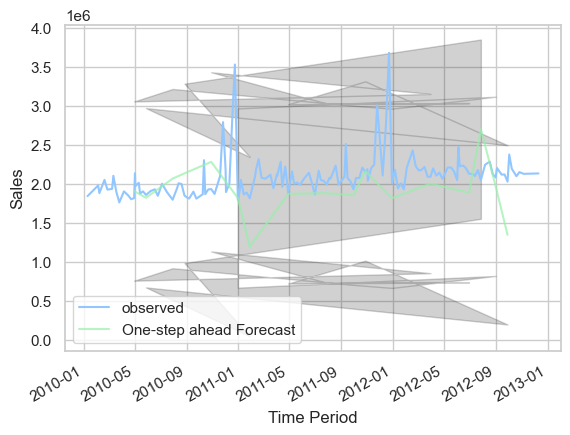

In [ ]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 299827951974.36


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

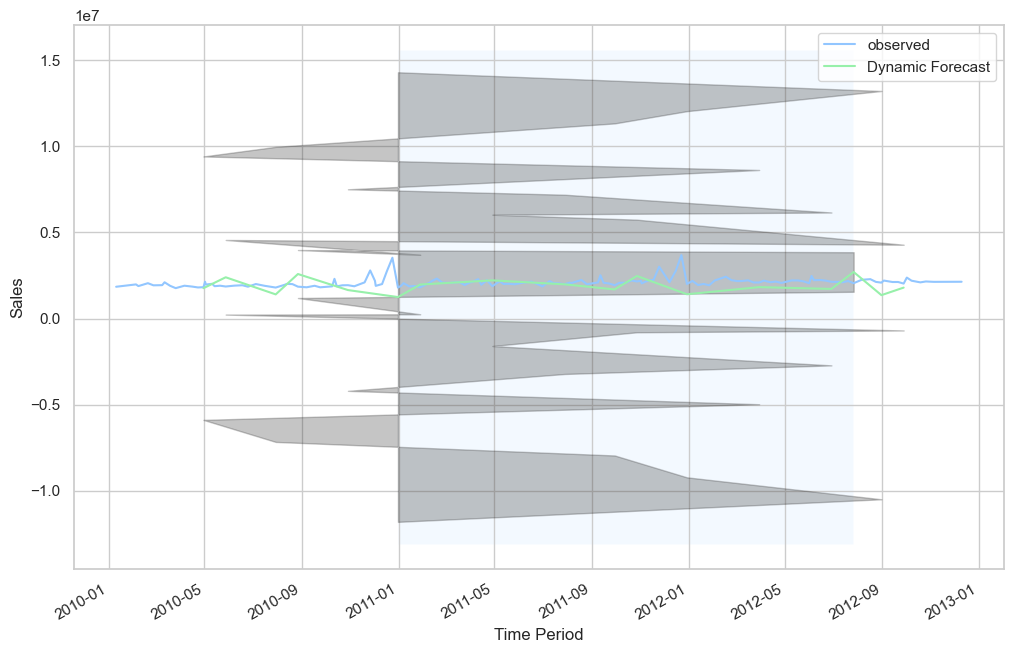

In [ ]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [ ]:
past_sales=sales
past_sales.head()

,Weekly_Sales
Date,
2011-01-04,1900246.47
2012-01-06,2179360.94
2011-01-07,2051533.53
2010-01-10,1842821.02
2012-02-03,2206319.90


In [ ]:
predicted_sales=pred_dynamic_ci
predicted_sales.head()

,lower Weekly_Sales,upper Weekly_Sales
Date,,
2012-07-27,1.552306e+06,3.846625e+06
2010-08-27,1.189157e+06,3.973421e+06
2011-01-28,2.461506e+05,3.698116e+06
2010-05-28,2.279897e+05,4.556900e+06
2012-09-28,-6.931738e+05,4.280518e+06
